In [2]:
import csv
import numpy as np
import pandas as pd
Multimeas = pd.read_csv("C:/Users/chris/Desktop/projects/optometry/jupyter/opt.csv")

In [3]:
#view imported data
roi_df = Multimeas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1F846A6D8>]],
      dtype=object)

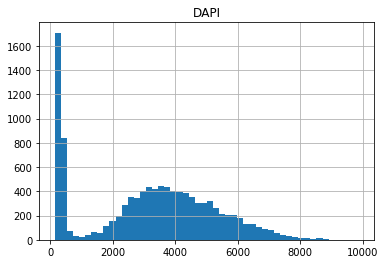

In [4]:
roi_df.hist(column="DAPI", bins=50)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from pylab import *
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [15]:
DAPIasList = roi_df["DAPI"].tolist()

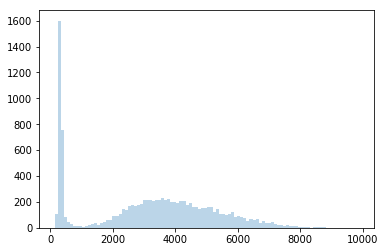

In [16]:
y,x,_=hist(DAPIasList,100,alpha=.3,label='data')

In [17]:
x=(x[1:]+x[:-1])/2

In [18]:
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

In [48]:
find_peaks(DAPIasList) #something neets to be done here

(array([    3,     5,     7, ..., 10664, 10666, 10670], dtype=int64), {})

[5.00000000e+02 5.00000000e-01 1.60000000e+03 3.49976826e+03
 1.00000000e+00 3.00000000e+02] 
 [inf inf inf inf inf inf]


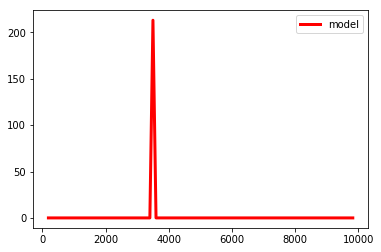

In [55]:
expected=(500,0.5,1600,3500,1,300)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)    